In [30]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [31]:
# define state
class BMIState(TypedDict):

    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [36]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight / (height**2)

    state['bmi'] = round(bmi,2)

    return state

def fitness_level(state: BMIState) -> BMIState:
    bmi = state['bmi']

    if bmi < 18.5:
        state['category'] = "Underweight"
    elif 18.5 <= bmi <25:
        state['category'] = "Normal"
    elif 25 <= bmi < 30:
        state['category'] = "Overweight"
    else:
        state['category'] = "Obese"

    return state

In [37]:
# define your graph
graph = StateGraph(BMIState)

# add nodes to your graph
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('fitness_level',fitness_level)

# add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'fitness_level')
graph.add_edge('fitness_level',END)

# compile the graph
workflow = graph.compile()

In [38]:
# execute the graph
initial_state = {'weight_kg':80,'height_m':1.73}

final_state = workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}


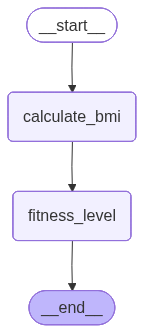

In [39]:
# to view the workflow
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png()) 